In [ ]:
# 객체 면적 함수
import math

# 방의 길이
w = 3.15
h = 4.95
diagonal_line = math.sqrt(pow(w, 2) + pow(h, 2))


# 가로길이
def width_length(radar1, radar2, radar3, radar4):
    if radar1 + radar3 < 3.2 and radar2 + radar4 < 3.2:
        return min(w - abs(radar1 + radar3), w - abs(radar2 + radar4))
    elif radar1 + radar3 < 3.2 and radar2 + radar4 >= w:
        return w - abs(radar1 + radar3)
    elif radar1 + radar3 >= w and radar2 + radar4 < 3.2:
        return w - abs(radar2 + radar4)
    elif (radar1 + radar3 >= w and radar2 + radar4 >= w) and (radar1 + radar4 < diagonal_line and radar2 + radar3 < diagonal_line):
        return diagonal_line - (radar2 + radar3)
    else:
        return 0


# 세로길이
def high_length(radar1, radar2, radar3, radar4):
    if radar1 + radar2 < 4.6 and radar3 + radar4 < 4.6:
        return min(h - abs(radar1 + radar2),h - abs(radar3 + radar4))
    elif radar1 + radar2 < 4.6 and radar3 + radar4 >= h:
        return h - abs(radar1 + radar2)
    elif radar1 + radar2 >= h and radar3 + radar4 < 4.6:
        return h - abs(radar3 + radar4)
    elif (radar1 + radar3 >= w and radar2 + radar4 >= w) and (radar1 + radar4 < diagonal_line and radar2 + radar3 < diagonal_line):
        return diagonal_line - (radar1 + radar4) 
    else:
        return 0


# 객체면적
def target_section(radar1, radar2, radar3, radar4, width_length, high_length):
    if radar1 == 0 and radar2 == 0 and radar3 == 0 and radar4 == 0 :
        return 0
    elif (radar1 > w and radar2 > w) and (math.sqrt(radar1**2 - w**2) + math.sqrt(radar2**2 - w**2)) > 4.6:
        return 0
    elif (radar3 > w and radar4 > w) and (math.sqrt(radar3**2 - w**2) + math.sqrt(radar4**2 - w**2)) > 4.6:
        return 0
    elif radar1 >= diagonal_line or radar2 >= diagonal_line or radar3 >= diagonal_line or radar4 >= diagonal_line:
        return 0
    elif (radar1 > w and radar2 > w) and (math.sqrt(radar1**2 - w**2) >= radar3 or math.sqrt(radar2**2 - w**2) >= radar4) and (math.sqrt(radar1**2 - w**2) + math.sqrt(radar2**2 - w**2)) < h:
        return (h - (max(math.sqrt(radar1**2 - w**2), radar3) + max(math.sqrt(radar2**2 - w**2), radar4))) * (h - (max(math.sqrt(radar1**2 - w**2), radar3) + max(math.sqrt(radar2**2 - w**2), radar4))) / 4
    elif (radar3 > w and radar4 > w) and (math.sqrt(radar3**2 - w**2) >= radar1 or math.sqrt(radar4**2 - w**2) >= radar2) and (math.sqrt(radar3**2 - w**2) + math.sqrt(radar4**2 - w**2)) < h:
        return (h - (max(math.sqrt(radar3**2 - w**2), radar1) + max(math.sqrt(radar4**2 - w**2), radar1))) * (h - (max(math.sqrt(radar3**2 - w**2), radar1) + max(math.sqrt(radar4**2 - w**2), radar1))) / 4
    else:
        return width_length * high_length


In [ ]:
# 파일 이름 불러오기

import glob
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/Project/task5/label_data"

file_path = glob.glob("{}/*.txt".format(path))

# os 이용해서 파일명 추출하기
import os

file_list = os.listdir(path)
file_list_txt = [file for file in file_list if file.endswith(".txt")]
# print(file_list_txt)

# csv파일 생성하기

for i in file_list_txt:
    file_name = i[:-4]
    with open("/content/drive/MyDrive/Project/task5/label_data/{}.txt".format(file_name), "rt") as f: 
        data = f.readlines()

        # 레이블 값 불러오기
        data_li = []
        for i in range(len(data)-1):
            data2 = data[i].strip().split(',')
            data2 = np.array(data2)

            data_li.append(data2)
        # print(data_li)
        col = ['User', 'Situation','Timestamp','Radar1','Radar2','Radar3','Radar4','Speed1','Speed2','Speed3','Speed4']
        df_data = pd.DataFrame(data = data_li, columns= col)
        # df_info = df_data.iloc[:,:3]
        # df_float = df_data.iloc[:,3:12].astype('float')

        # print(df_info)
        # print(df_float)
        df_data = pd.concat([df_info,df_float], axis = 1)
        df_data.drop('User',axis= 1, inplace = True)
        # print(df_data)

        # 보간하기
        df_data.replace(0, np.nan, inplace = True)
        # print(df_data)
        # df_data = df_data[df_data.Speed1 > 0.2]

        df_data_li = [] # Radar값에 전부 Nan값이거나 값이 1개만 있는경우 리스트에 담아서 드롭해주기.
        for i in range(len(df_data)):
            df_data_count = df_data.iloc[i, 2: 6].count()
            if df_data_count == 0 or df_data_count == 1:
                df_data_li.append(i)

        # print(df_data_li)

        df_data = df_data.drop(df_data_li)
        # print(df_data)

        df_data.interpolate(limit_direction= 'both', method = 'linear', inplace = True) # 보간하기
        
        # print(df_data)

        if len(df_data) == 0: # 값이 전부 제거된 경우(데이터 행이 0인 경우) NaN으로 채워주기
            df_data.loc['0'] = None

        df_data.fillna(0, inplace = True) # 마지막 결측치 0으로 채워주기

        df_data.reset_index(inplace = True) # 원본 인덱스를 보기위해 인덱스 재정렬하기

        # print(df_data)
        
        
        # 문자열과 숫자열 분리하기
        df_data_arr = df_data.to_numpy()
        df_data_index_arr = df_data_arr[:, :3]
        df_data_data_arr = df_data_arr[:, 3:]
        # print(df_data_arr)

        # 보간 후 원의 반지름 추출하기
        # df_data_arr = np.array(df_data)
        df_data_radar1 = df_data_data_arr[:,0]
        df_data_radar2 = df_data_data_arr[:,1]
        df_data_radar3 = df_data_data_arr[:,2]
        df_data_radar4 = df_data_data_arr[:,3]

        target_li = []
        for i in range(len(df_data_data_arr)):
            circle_radius1 = df_data_radar1[i] 
            circle_radius2 = df_data_radar2[i]
            circle_radius3 = df_data_radar3[i]
            circle_radius4 = df_data_radar4[i]

            width_len = width_length(circle_radius1, circle_radius2, circle_radius3, circle_radius4)
            high_len = high_length(circle_radius1, circle_radius2, circle_radius3, circle_radius4)

            Final_target_section = target_section(circle_radius1, circle_radius2, circle_radius3, circle_radius4, width_len, high_len)

            target_li.append(Final_target_section)

        df_data['Target_section'] = target_li
        # print(df_data)

        # 면적의 차
        Section_Difference = [0] 

        for i in range(1,len(df_data)):
            diff = df_data.iloc[i, 11] - df_data.iloc[i-1, 11]

            Section_Difference.append(diff)

        df_data['Section_Diff'] = Section_Difference

        # print(df_data)

        # 시간의 변화
        # timestemp 시간으로 변환하기
        # 1초는 1000mm/s 총 50개의 프레임.
        # 즉, 1타임스탬프 = 0.02mm/s

        Time_Difference = [0] 
        df_time = df_data.iloc[:, 2].astype('int')

        for i in range(1,len(df_time)):
            diff = (df_time.iloc[i] - df_time.iloc[i-1]) * 0.02 # 시간으로 변환하기 위해 0.02 곱해주기

            Time_Difference.append(diff)

        df_data['Time_Diff'] = Time_Difference

        # print(df_data)

        # 속도 변화
        speed_diff = [np.array([0, 0, 0, 0])]
        speed_difference = df_data_data_arr[1:, 4:8] - df_data_data_arr[:-1,4:8]
        speed_diff.extend(speed_difference)
        # print(speed_diff)
        df_speed = pd.DataFrame(speed_diff, columns = ['Speed_Diff_1', 'Speed_Diff_2', 'Speed_Diff_3', 'Speed_Diff_4'])
        # print(df_speed)

        # 가속도 = 속도변화 / 시간변화
        time_arr = np.array(df_data['Time_Diff']) # 시간값
        Acceleration = [np.array([0, 0, 0, 0])]
        for i in range(1, len(df_speed)):
            acc = speed_diff[i] / time_arr[i]
            Acceleration.append(acc)

        # print(time_arr)
        # print(Acceleration)
        # print(df_data)

        df_accleration = pd.DataFrame(data = Acceleration, columns = ['Accleration_1', 'Accleration_2', 'Accleration_3', 'Accleration_4'])

        df_data = pd.concat([df_data, df_speed,df_accleration], axis = 1)
        # print(df_data)
        # print(df_data.columns)

        df_data.rename(columns={"index": "Original_index"}, inplace = True)
        df_data.drop(columns = ['Timestamp', 'Speed1', 'Speed2', 'Speed3', 'Speed4'],inplace = True) # 불필요한 행 드롭해주기
        # print(df_data)
        
        # for i in range(len(df_data)):
        #     if df_data['Speed_Diff_4'][i] == 'move':
        #         print(file_name)


        df_data.to_csv(path_or_buf = "/content/drive/MyDrive/Project/task5/label_data_csv6/{}.csv".format(file_name), encoding = 'utf-8', index = False,
                    header = False)

        # column = ['Original_index', 'Situation', 'Radar1', 'Radar2', 'Radar3', 'Radar4',
        #    'Target_section', 'Section_Diff', 'Time_Diff', 'Speed_Diff_1',
        #    'Speed_Diff_2', 'Speed_Diff_3', 'Speed_Diff_4', 'Accleration_1',
        #    'Accleration_2', 'Accleration_3', 'Accleration_4']

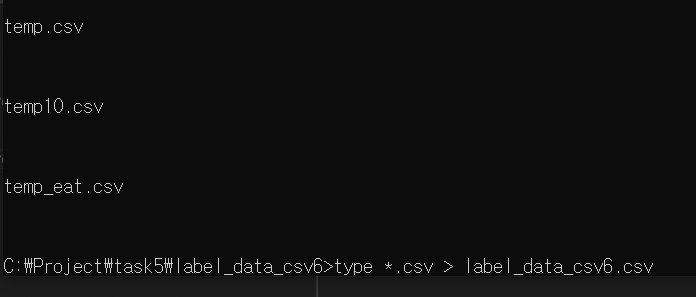

In [ ]:
import pandas as pd

col = ['Original_index', 'Situation', 'Radar_1', 'Radar_2', 'Radar_3', 'Radar_4', 'Target_section',	'Section_Diff', 'Time_dff', 'Speed_Diff_1', 'Speed_Diff_2', 'Speed_Diff_3', 'Speed_Diff_4', 'Accleration_1', 'Accleration_2', 'Accleration_3', 'Accleration_4']
dataset = pd.read_csv('/content/drive/MyDrive/Project/task5/label_data_csv6 - 복사본 (2).csv', encoding='utf8', names = col)
dataset.info()
dataset

In [ ]:
df_data.columns

In [ ]:
# 하나만 추출해보기

file_name = 'fall381'

with open("/content/drive/MyDrive/Project/task5/label_data/{}.txt".format(file_name), "rt") as f: 
        data = f.readlines()

        # 레이블 값 불러오기
        data_li = []
        for i in range(len(data)-1):
            data2 = data[i].strip().split(',')
            data2 = np.array(data2)

            data_li.append(data2)
        # print(data_li)
        col = ['User', 'Situation','Timestamp','Radar1','Radar2','Radar3','Radar4','Speed1','Speed2','Speed3','Speed4']
        df_data = pd.DataFrame(data = data_li, columns= col)
        df_info = df_data.iloc[:,:3]
        df_float = df_data.iloc[:,3:12].astype('float')

        # print(df_info)
        # print(df_float)
        df_data = pd.concat([df_info,df_float], axis = 1)
        df_data.drop('User',axis= 1, inplace = True)
        # print(df_data)

        # 보간하기
        df_data.replace(0, np.nan, inplace = True)
        # print(df_data)
        # df_data = df_data[df_data.Speed1 > 0.2]

        df_data_li = [] # Radar값에 전부 Nan값이거나 값이 1개만 있는경우 리스트에 담아서 드롭해주기.
        for i in range(len(df_data)):
            df_data_count = df_data.iloc[i, 2: 6].count()
            if df_data_count == 0 or df_data_count == 1:
                df_data_li.append(i)

        # print(df_data_li)

        df_data = df_data.drop(df_data_li)
        # print(df_data)

        df_data.interpolate(limit_direction= 'both', method = 'linear', inplace = True) # 보간하기
        
        # print(df_data)

        if len(df_data) == 0: # 값이 전부 제거된 경우(데이터 행이 0인 경우) NaN으로 채워주기
            df_data.loc['0'] = None

        df_data.fillna(0, inplace = True) # 마지막 결측치 0으로 채워주기

        df_data.reset_index(inplace = True) # 원본 인덱스를 보기위해 인덱스 재정렬하기

        # print(df_data)
        
        
        # 문자열과 숫자열 분리하기
        df_data_arr = df_data.to_numpy()
        df_data_index_arr = df_data_arr[:, :3]
        df_data_data_arr = df_data_arr[:, 3:]
        # print(df_data_arr)

        # 보간 후 원의 반지름 추출하기
        # df_data_arr = np.array(df_data)
        df_data_radar1 = df_data_data_arr[:,0]
        df_data_radar2 = df_data_data_arr[:,1]
        df_data_radar3 = df_data_data_arr[:,2]
        df_data_radar4 = df_data_data_arr[:,3]

        target_li = []
        for i in range(len(df_data_data_arr)):
            circle_radius1 = df_data_radar1[i] 
            circle_radius2 = df_data_radar2[i]
            circle_radius3 = df_data_radar3[i]
            circle_radius4 = df_data_radar4[i]

            width_len = width_length(circle_radius1, circle_radius2, circle_radius3, circle_radius4)
            high_len = high_length(circle_radius1, circle_radius2, circle_radius3, circle_radius4)

            Final_target_section = target_section(circle_radius1, circle_radius2, circle_radius3, circle_radius4, width_len, high_len)

            target_li.append(Final_target_section)

        df_data['Target_section'] = target_li
        # print(df_data)

        # 면적의 차
        Section_Difference = [0] 

        for i in range(1,len(df_data)):
            diff = df_data.iloc[i, 11] - df_data.iloc[i-1, 11]

            Section_Difference.append(diff)

        df_data['Section_Diff'] = Section_Difference

        # print(df_data)

        # 시간의 변화
        # timestemp 시간으로 변환하기
        # 1초는 1000mm/s 총 50개의 프레임.
        # 즉, 1타임스탬프 = 0.02mm/s

        Time_Difference = [0] 
        df_time = df_data.iloc[:, 2].astype('int')

        for i in range(1,len(df_time)):
            diff = (df_time.iloc[i] - df_time.iloc[i-1]) * 0.02 # 시간으로 변환하기 위해 0.02 곱해주기

            Time_Difference.append(diff)

        df_data['Time_Diff'] = Time_Difference

        # print(df_data)

        # 속도 변화
        speed_diff = [np.array([0, 0, 0, 0])]
        speed_difference = df_data_data_arr[1:, 4:8] - df_data_data_arr[:-1,4:8]
        speed_diff.extend(speed_difference)
        # print(speed_diff)
        df_speed = pd.DataFrame(speed_diff, columns = ['Speed_Diff_1', 'Speed_Diff_2', 'Speed_Diff_3', 'Speed_Diff_4'])
        # print(df_speed)

        # 가속도 = 속도변화 / 시간변화
        time_arr = np.array(df_data['Time_Diff']) # 시간값
        Acceleration = [np.array([0, 0, 0, 0])]
        for i in range(1, len(df_speed)):
            acc = speed_diff[i] / time_arr[i]
            Acceleration.append(acc)

        # print(time_arr)
        # print(Acceleration)
        # print(df_data)

        df_accleration = pd.DataFrame(data = Acceleration, columns = ['Accleration_1', 'Accleration_2', 'Accleration_3', 'Accleration_4'])

        df_data = pd.concat([df_data, df_speed,df_accleration], axis = 1)
        # print(df_data)
        

        df_data.rename(columns={"index": "Original_index"}, inplace = True)
        df_data.drop(columns = ['Timestamp', 'Speed1', 'Speed2', 'Speed3', 'Speed4'],inplace = True) # 불필요한 행 드롭해주기
        print(df_data)
        # print(df_data['Speed_Diff_4'][i] == 'move')
        # if df_data['Speed_Diff_4'][1] == 0:
        #     print(file_name)


        df_data.to_csv(path_or_buf = "/content/drive/MyDrive/Project/task5/{}.csv".format('rest2-2'), encoding = 'utf-8', index = False,
                    header = False)